# Multiple Linear Regression
<br> [1]**dataset** : https://www.kaggle.com/datasets/amineoumous/50-startups-data
<br> [2]            :https://www.kaggle.com/datasets/farhanmd29/50-startups
<br> [3]**codes**: https://www.theprogrammingassignmenthelp.com/blog-details/python-50-startups
<br> [4]           https://rpubs.com/muhammad_rmaulana/719227
<br> [5]**heatmap**: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
<br> [6]**boxplot** : https://seaborn.pydata.org/tutorial/categorical.html
<br> [7]**Boxplot** to detect outlier: https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/
<br> [8] Visualizing categorical data : https://seaborn.pydata.org/tutorial/categorical.html
<br> [9] OneHotEncoding: https://vitalflux.com/one-hot-encoding-concepts-python-code-examples/
<br> :https://www.projectpro.io/recipes/convert-categorical-variables-into-numerical-variables-in-python
<br> [10] **Evaluation metric** : https://www.freecodecamp.org/news/evaluation-metrics-for-regression-problems-machine-learning/
https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks

## Importing the libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

## Importing the dataset

In [4]:
dataset = pd.read_csv('50_Startups.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values
display(dataset.head())
display(dataset.info())
print(dataset.shape)
print(dataset.columns)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


None

(50, 5)
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


In [5]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [6]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

### Creating mask: Triangular correlation heatmap
https://www.geeksforgeeks.org/how-to-create-a-triangle-correlation-heatmap-in-seaborn-python/

In [7]:
print('The correlation matrix is \n\n', dataset.corr(),'\n\n')
print('The unit matrix like the correlation matrix is \n\n', np.ones_like(dataset.corr()), '\n\n')
print('The upper triangular matrix for masking: \n\n', np.triu(np.ones_like(dataset.corr())))

The correlation matrix is 

                  R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000 


The unit matrix like the correlation matrix is 

 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 


The upper triangular matrix for masking: 

 [[1. 1. 1. 1.]
 [0. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]


<AxesSubplot:>

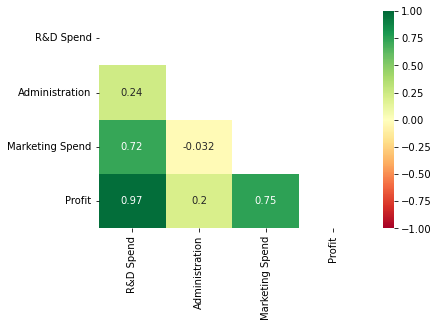

In [8]:
mask= np.triu(np.ones_like(dataset.corr()))
sns.heatmap(dataset.corr(), vmin = -1, vmax=1, annot = True, cmap = 'RdYlGn', mask = mask)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f714d5ac40>,
 'caps': [<matplotlib.lines.Line2D at 0x1f714d692e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f714d5a7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f714d69a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f714d69d90>],
 'means': []}

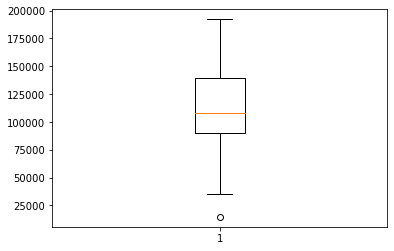

In [9]:
plt.boxplot(dataset['Profit'], notch = False)

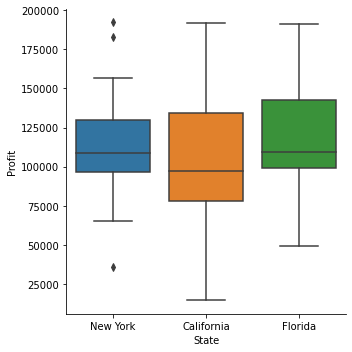

In [10]:
sns.catplot(data=dataset, x="State", y="Profit", kind="box")

### Separate the Features and Target

In [11]:
# X = dataset.iloc[:,:4]
# print(X.shape)
# print(type(X))
# X.head()

In [12]:
y = dataset[['Profit']]
X = dataset.drop(columns = 'Profit')
print('The shape of X : ', X.shape)
print('\nThe shape of y : ', y.shape)
print('\nType of X : ', type(X))
print('\nTpye of y : ', type(y))
print('\nFeatures : ', X.columns)
print('\nTarget variable: ', y.columns)
display(X.head(), y.head())

The shape of X :  (50, 4)

The shape of y :  (50, 1)

Type of X :  <class 'pandas.core.frame.DataFrame'>

Tpye of y :  <class 'pandas.core.frame.DataFrame'>

Features :  Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], dtype='object')

Target variable:  Index(['Profit'], dtype='object')


,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [13]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Encoding categorical data

In [14]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [15]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [16]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [17]:
#Method 1: Using get_dummies
y = dataset[['Profit']]
X = dataset.drop(columns = 'Profit')
X_state = pd.get_dummies(X['State'])

X = pd.concat([X, X_state], axis=1)  #combine dummy variables with the features

X = X.drop('State', axis = 1) # drop the catergorical variable
display(X.head(), y.head())

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [18]:
type(X_state)

pandas.core.frame.DataFrame

In [19]:
# # Method 2: Using OneHotEncoder
# y = dataset[['Profit']]
# X = dataset.drop(columns = 'Profit')
# En = OneHotEncoder()
# encoded = En.fit_transform(X['State'].values.reshape(-1,1)).toarray()     # return numpy arrat
# encoded_df = pd.DataFrame(encoded, columns=En.get_feature_names())        # trunsform to dataframe
# #concat with original data
# # df1 = pd.concat([X, encoded_df], axis=1).drop(['State'], axis=1)
# # encoded
# X2 = pd.concat([X,encoded_df], axis = 1)
# X3 = X2.drop(['State'], axis = 1)
# X2.head()
# En.get_feature_names()

In [20]:
# X.iloc[:,3]

In [21]:
# # Method 3: Using ColumnTransformer
# y = dataset[['Profit']]
# X = dataset.drop(columns = 'Profit')
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
# X4 = np.array(ct.fit_transform(X))
# X5 = pd.DataFrame(X4)
# X5.head()

In [22]:
# print(X)

## Splitting the dataset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Training the Multiple Linear Regression model on the Training set

In [24]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept = False, positive=True)
LR.fit(X_train, y_train)

LinearRegression(fit_intercept=False, positive=True)

In [25]:
b = LR.coef_
a = LR.intercept_
print(a, type(a))
print (b, type(b))
print(X.columns, type(X.columns))
print(b.shape, X.shape)

df_b = pd.DataFrame(b.reshape(-1,1), index =  X.columns, columns = ['Coefficients'])
df_a = pd.DataFrame(a, index=['Intercept'], columns = ['Coefficients'])

coefficients = pd.concat([df_a,df_b], axis = 0)
display(df_a)
display (coefficients)

# LR.n_features_in_                    

0.0 <class 'float'>
[[7.84745177e-01 0.00000000e+00 3.82996642e-02 4.54767263e+04
  4.61413145e+04 4.53173178e+04]] <class 'numpy.ndarray'>
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'California',
       'Florida', 'New York'],
      dtype='object') <class 'pandas.core.indexes.base.Index'>
(1, 6) (50, 6)


,Coefficients
Intercept,0.0


,Coefficients
Intercept,0.000000
R&D Spend,0.784745
Administration,0.000000
Marketing Spend,0.038300
California,45476.726283
Florida,46141.314493
New York,45317.317754


In [26]:
LR = LinearRegression(fit_intercept = True, positive=False) # 
LR.fit(X_train, y_train)
b = LR.coef_
a = LR.intercept_
df_b = pd.DataFrame(b.reshape(-1,1), index =  X.columns, columns = ['Coefficients'])
df_a = pd.DataFrame(a, index=['Intercept'], columns = ['Coefficients'])
coefficients = pd.concat([df_a,df_b], axis = 0)
# display (coefficients)

In [27]:
X_test.index

Int64Index([13, 39, 30, 45, 17, 48, 26, 25, 32, 19], dtype='int64')

In [28]:
y_test.index

Int64Index([13, 39, 30, 45, 17, 48, 26, 25, 32, 19], dtype='int64')

## Predicting the Test set results

In [29]:
LR.predict(X_test)
y_predicted = np.round(LR.predict(X_test),2)
y_predicted = pd.DataFrame(y_predicted, index = X_test.index, columns = ['Profit_predicted'])
y_values = pd.concat([y_predicted,y_test], axis = 1)
y_values['Error'] = y_values['Profit'] - y_values['Profit_predicted']

print(type(y_predicted), y_predicted.shape)
# display(y_predicted)
print((y_values['Error']**2).sum()/y_values['Error'].count())
# display(y_values)

<class 'pandas.core.frame.DataFrame'> (10, 1)
82010361.99282


In [30]:
y_values['Error'].var()

87981896.25562668

In [31]:
y_values['Error'].count()

10

In [32]:
LR = LinearRegression(fit_intercept = True, positive=False) # 
LR.fit(X_train, y_train)

y_predicted = np.round(LR.predict(X_test),2)
y_predicted = pd.DataFrame(y_predicted, index = X_test.index, columns = ['Profit_predicted'])
y_df = pd.concat([y_predicted,y_test], axis = 1)
y_df['Error'] = y_values['Profit'] - y_values['Profit_predicted']

print(type(y_predicted), y_predicted.shape)
# display(y_predicted)
print((((y_df['Error']-y_df['Error'].mean())**2).sum()/((y_df['Error'].count())-1))**0.5)
print(y_df['Error'].sum()/(y_df['Error'].count()))
# display(y_df)
y_df.describe()

<class 'pandas.core.frame.DataFrame'> (10, 1)
9379.866537196927
1681.2659999999983


,Profit_predicted,Profit,Error
count,10.000000,10.000000,10.000000
mean,95775.048000,97456.314000,1681.266000
std,28165.817673,29996.149266,9379.866537
min,46357.460000,35673.410000,-15239.010000
25%,87856.157500,85111.280000,-3547.045000
50%,100160.365000,102835.565000,44.330000
75%,112258.410000,118933.730000,7648.627500
max,128750.480000,134307.350000,18568.620000


## Performance Evaluation Metric

#### Goodness of fit: Coefficient of Determination(R2)

In [33]:
#R-square
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)

0.8987266427313217

#### Measures of Error

In [34]:
#mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predicted)

#Root MSE
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,y_predicted))

#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_predicted)

# Mean Absolute Percentage Error
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test,y_predicted)

print('\nmse  = ', mse, '\nrmse = ', rmse, '\nmae  = ', mae, '\nmape = ', mape)


mse  =  82010361.99282 
rmse =  9055.957265403807 
mae  =  6961.478 
mape =  0.10278190659536243


## Improving model performance

### Scaling

In [35]:
#MinMax scaler
# from sklearn import preprocessing
# mm_scaler = preprocessing.MinMaxScaler()
# Regressor_train_minmax = mm_scaler.fit_transform(Regressor_train)
# mm_scaler.transform(Regressor_test)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),index = X_train.index, columns = X_train.columns)
type(X_train_scaled)

pandas.core.frame.DataFrame

In [38]:
display(X_train_scaled.describe())

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.469841,0.531809,0.499693,0.325000,0.350000,0.325000
std,0.289675,0.208995,0.243467,0.474342,0.483046,0.474342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243370,0.390495,0.339887,0.000000,0.000000,0.000000
50%,0.454337,0.524134,0.529463,0.000000,0.000000,0.000000
75%,0.726300,0.720633,0.646105,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Ridge and Lasso
- Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. 
- This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of  the coefficients. 
- The loss function for Ridge regression is given by:<br> **Loss function = OLS + alpha * summation (squared coefficient values)**
- Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression.
- In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm). 
- The loss function for Lasso Regression is given by:<br> **Loss function = OLS + alpha * summation** (absolute values of the magnitude of the coefficients)

In [39]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [41]:
y_train.shape
# pred_train_rr.shape
X_train.shape

(40, 6)

In [42]:
LR = LinearRegression()
LR.fit(X_train, y_train)
pred_train= LR.predict(X_train)
print('Training MSE = ', np.sqrt(mean_squared_error(y_train,pred_train)))
print('Training R2 = ', r2_score(y_train, pred_train))

pred_test= LR.predict(X_test)
print('Test MSE = ', np.sqrt(mean_squared_error(y_test,pred_test))) 
print('Test data R2 = ', r2_score(y_test, pred_test))

Training MSE =  8927.489013300055
Training R2 =  0.9537019995248526
Test MSE =  9055.957323454837
Test data R2 =  0.8987266414329449


In [43]:
rr = Ridge(alpha=0.5)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print('Training MSE = ', np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('Training R2 = ', r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print('Test MSE = ', np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print('Test data R2 = ', r2_score(y_test, pred_test_rr))

Training MSE =  8927.503701684835
Training R2 =  0.9537018471766605
Test MSE =  9053.411637386154
Test data R2 =  0.8987835705753429


In [44]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train) 
pred_train_lasso= lasso.predict(X_train)
print('Training MSE = ', np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('Training R2 = ', r2_score(y_train, pred_train_lasso))

pred_test_lasso= lasso.predict(X_test)
print('Test MSE = ', np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print('Test data R2 = ', r2_score(y_test, pred_test_lasso))

Training MSE =  8927.489013349892
Training R2 =  0.9537019995243357
Test MSE =  9055.952751138924
Test data R2 =  0.8987267436979303


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103280856.45576715, tolerance: 6885831.721858118
  model = cd_fast.enet_coordinate_descent(
